<a href="https://colab.research.google.com/github/Victor11072/intermediate-1/blob/main/Intermediate_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
traffic_violation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intermediate Project 1/Traffic_Violations.csv/Traffic_Violations.csv')
print(traffic_violation.head())

<ipython-input-2-f803215d03d3>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_violation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intermediate Project 1/Traffic_Violations.csv/Traffic_Violations.csv')


  Date Of Stop Time Of Stop Agency  \
0   09/24/2013     17:11:00    MCP   
1   12/20/2012     00:41:00    MCP   
2   07/20/2012     23:12:00    MCP   
3   03/19/2012     16:10:00    MCP   
4   12/01/2014     12:52:00    MCP   

                                         SubAgency  \
0                      3rd district, Silver Spring   
1                           2nd district, Bethesda   
2                         5th district, Germantown   
3                           2nd district, Bethesda   
4  6th district, Gaithersburg / Montgomery Village   

                                         Description  \
0  DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...   
1                  DRIVING WHILE IMPAIRED BY ALCOHOL   
2                       FAILURE TO STOP AT STOP SIGN   
3  DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...   
4                 FAILURE STOP AND YIELD AT THRU HWY   

                                 Location   Latitude  Longitude Accident  \
0                         8804 FL

In [3]:
print(traffic_violation.info())
print(traffic_violation.shape)
print(traffic_violation.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015270 entries, 0 to 1015269
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1015270 non-null  object 
 1   Time Of Stop             1015270 non-null  object 
 2   Agency                   1015270 non-null  object 
 3   SubAgency                1015270 non-null  object 
 4   Description              1015261 non-null  object 
 5   Location                 1015268 non-null  object 
 6   Latitude                 930456 non-null   float64
 7   Longitude                930456 non-null   float64
 8   Accident                 1015270 non-null  object 
 9   Belts                    1015270 non-null  object 
 10  Personal Injury          1015270 non-null  object 
 11  Property Damage          1015270 non-null  object 
 12  Fatal                    1015270 non-null  object 
 13  Commercial License       1015270 non-null 

In [4]:
tolerance = traffic_violation.isnull().sum()/traffic_violation.shape[0] * 100
print(tolerance)

Date Of Stop               0.000000
Time Of Stop               0.000000
Agency                     0.000000
SubAgency                  0.000000
Description                0.000886
Location                   0.000197
Latitude                   8.353837
Longitude                  8.353837
Accident                   0.000000
Belts                      0.000000
Personal Injury            0.000000
Property Damage            0.000000
Fatal                      0.000000
Commercial License         0.000000
HAZMAT                     0.000000
Commercial Vehicle         0.000000
Alcohol                    0.000000
Work Zone                  0.000000
State                      0.005811
VehicleType                0.000000
Year                       0.628601
Make                       0.004728
Model                      0.016646
Color                      1.332256
Violation Type             0.000000
Charge                     0.000000
Article                    5.118047
Contributed To Accident    0

In [5]:
traffic_violation_new = traffic_violation.dropna(subset = ['Latitude', 'Longitude', "Article", 'Year', 'Model', 'State', 'Location',
                                                           'Make', 'Color', 'Driver City', 'Driver State', 'DL State'])
print(traffic_violation_new.isnull().sum()/traffic_violation_new.shape[0] * 100)

Date Of Stop               0.000000
Time Of Stop               0.000000
Agency                     0.000000
SubAgency                  0.000000
Description                0.000805
Location                   0.000000
Latitude                   0.000000
Longitude                  0.000000
Accident                   0.000000
Belts                      0.000000
Personal Injury            0.000000
Property Damage            0.000000
Fatal                      0.000000
Commercial License         0.000000
HAZMAT                     0.000000
Commercial Vehicle         0.000000
Alcohol                    0.000000
Work Zone                  0.000000
State                      0.000000
VehicleType                0.000000
Year                       0.000000
Make                       0.000000
Model                      0.000000
Color                      0.000000
Violation Type             0.000000
Charge                     0.000000
Article                    0.000000
Contributed To Accident    0

In [6]:
print(traffic_violation_new.shape)

(869077, 35)


In [7]:
traffic_violation_new.columns = traffic_violation_new.columns.str.strip().str.lower().str.replace(' ', '_')
print(traffic_violation_new.columns)

Index(['date_of_stop', 'time_of_stop', 'agency', 'subagency', 'description',
       'location', 'latitude', 'longitude', 'accident', 'belts',
       'personal_injury', 'property_damage', 'fatal', 'commercial_license',
       'hazmat', 'commercial_vehicle', 'alcohol', 'work_zone', 'state',
       'vehicletype', 'year', 'make', 'model', 'color', 'violation_type',
       'charge', 'article', 'contributed_to_accident', 'race', 'gender',
       'driver_city', 'driver_state', 'dl_state', 'arrest_type',
       'geolocation'],
      dtype='object')


                violation_type
violation_type                
Citation                438090
SERO                        23
Warning                 430964


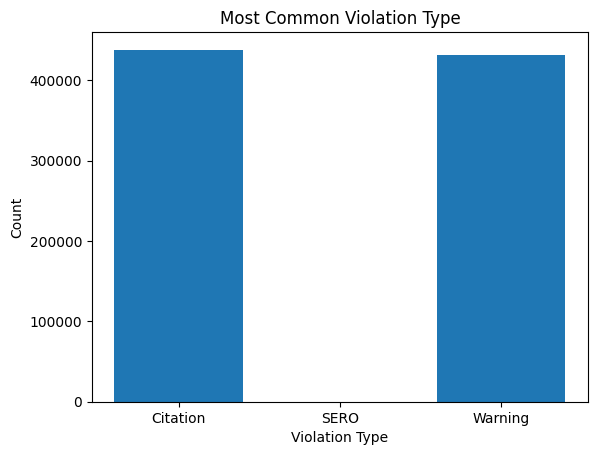

In [8]:
#Most common violation
import matplotlib.pyplot as plt
import seaborn as sns
unique_violation = traffic_violation_new.groupby('violation_type').agg({"violation_type":"count"})
print(unique_violation)

plt.bar(unique_violation.index, unique_violation['violation_type'])
plt.xlabel("Violation Type")
plt.ylabel("Count")
plt.title("Most Common Violation Type")
plt.show()

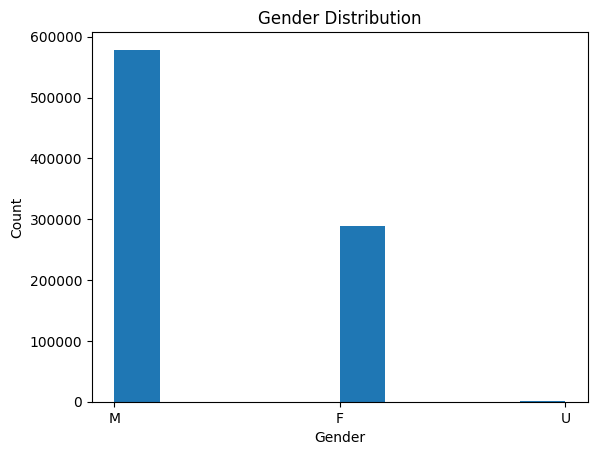

In [9]:
#Gender Distribution

plt.hist(traffic_violation_new['gender'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

In [10]:
print(traffic_violation_new['time_of_stop'].head())

1    00:41:00
2    23:12:00
3    16:10:00
4    12:52:00
5    21:19:00
Name: time_of_stop, dtype: object


In [11]:
traffic_violation_new['time_of_stop'] = pd.to_datetime(traffic_violation_new['time_of_stop'], format='%H:%M:%S')
traffic_violation_new['hour_of_stop'] = traffic_violation_new['time_of_stop'].dt.hour
print(traffic_violation_new['hour_of_stop'].head())
print(traffic_violation_new['hour_of_stop'].unique())

1     0
2    23
3    16
4    12
5    21
Name: hour_of_stop, dtype: int32
[ 0 23 16 12 21  1 13 20 22 18 17 19  8  7 10 11 14  9  2 15  5  4  3  6]


<ipython-input-11-bbf972956701>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_violation_new['time_of_stop'] = pd.to_datetime(traffic_violation_new['time_of_stop'], format='%H:%M:%S')
<ipython-input-11-bbf972956701>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_violation_new['hour_of_stop'] = traffic_violation_new['time_of_stop'].dt.hour


              hour_of_stop
hour_of_stop              
0                    46456
1                    37205
2                    27893
3                    18333
4                    11176
5                     7763
6                    12857
7                    32013
8                    49419
9                    44468
10                   44958
11                   37740
12                   35275
13                   36018
14                   37111
15                   31239
16                   42243
17                   44226
18                   34461
19                   30253
20                   33677
21                   46776
22                   64064
23                   63453


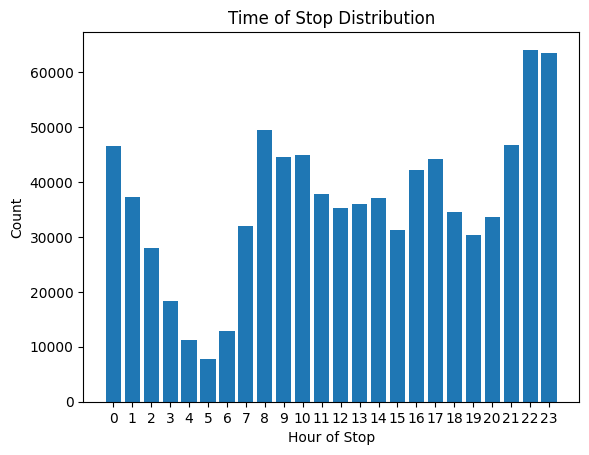

In [12]:
#labels = [f"{hour:02d}:00" for hour in range(24)]

hour_stop_counts = traffic_violation_new.groupby('hour_of_stop').agg({'hour_of_stop':'count'}).sort_index()
print(hour_stop_counts)

plt.bar(hour_stop_counts.index, hour_stop_counts['hour_of_stop'])
plt.xlabel("Hour of Stop")
plt.ylabel("Count")
plt.xticks(ticks=hour_stop_counts.index)
plt.title("Time of Stop Distribution")
plt.show()

violation_type  Citation  SERO  Warning
gender                                 
F                 131011     3   158482
M                 306959    20   271563
U                    120     0      919


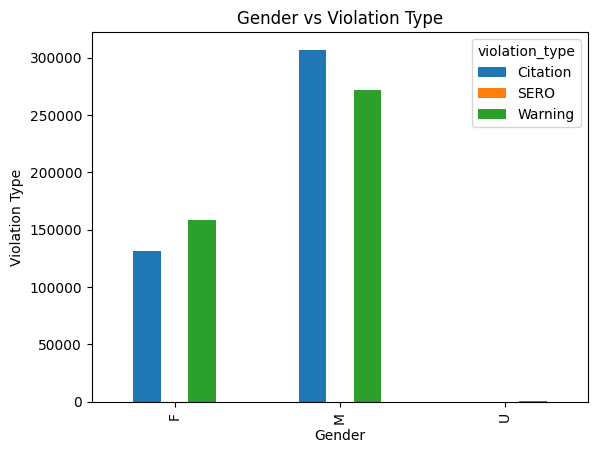

In [13]:
violation_by_gender = traffic_violation_new.groupby(['gender', 'violation_type']).size().unstack(fill_value=0)
print(violation_by_gender)
violation_by_gender.plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Violation Type")
plt.title("Gender vs Violation Type")
plt.show()

In [14]:
print(traffic_violation_new['date_of_stop'].head(10))

1     12/20/2012
2     07/20/2012
3     03/19/2012
4     12/01/2014
5     06/09/2012
6     09/11/2012
7     11/04/2012
8     08/27/2012
9     05/21/2012
11    10/08/2013
Name: date_of_stop, dtype: object


In [15]:
#Convert date_of_stop to datetime format and also extract day of stop to it name
traffic_violation_new['date_of_stop'] = pd.to_datetime(traffic_violation_new['date_of_stop'], format='%m/%d/%Y')
traffic_violation_new['day_of_stop'] = traffic_violation_new['date_of_stop'].dt.day_name()
print(traffic_violation_new['day_of_stop'].head(10))

<ipython-input-15-9bb64d632db5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_violation_new['date_of_stop'] = pd.to_datetime(traffic_violation_new['date_of_stop'], format='%m/%d/%Y')


1     Thursday
2       Friday
3       Monday
4       Monday
5     Saturday
6      Tuesday
7       Sunday
8       Monday
9       Monday
11     Tuesday
Name: day_of_stop, dtype: object


<ipython-input-15-9bb64d632db5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_violation_new['day_of_stop'] = traffic_violation_new['date_of_stop'].dt.day_name()


<ipython-input-16-8ebb2857f1a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_stop', data=traffic_violation_new, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette='magma')


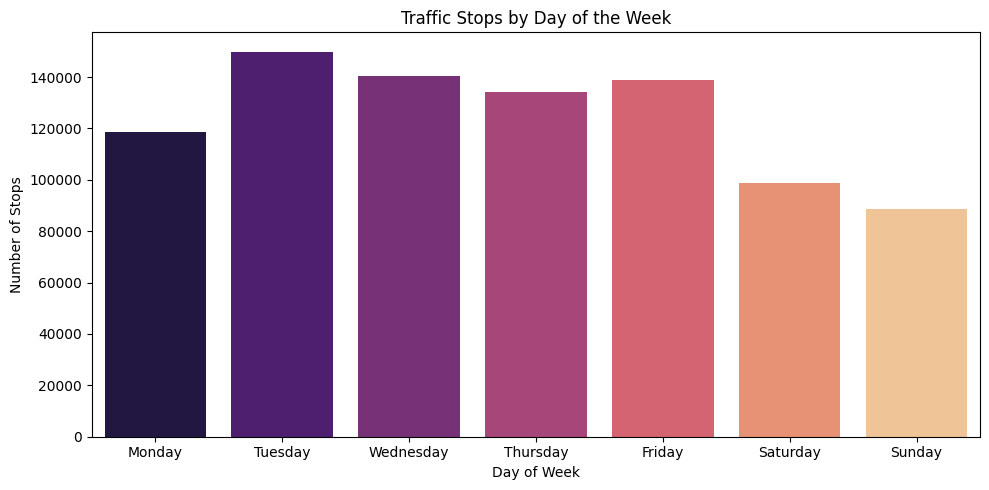

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x='day_of_stop', data=traffic_violation_new, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette='magma')
plt.title('Traffic Stops by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Stops')
plt.tight_layout()
plt.show()

In [17]:
#Trend aalysis of stop per time
traffic_violation_new['month_of_stop'] = traffic_violation_new['date_of_stop'].dt.month
#traffic_violation_new['month_of_stop'] = pd.to_datetime(traffic_violation_new['month_of_stop'])
print(traffic_violation_new['month_of_stop'].head(10))

1     12
2      7
3      3
4     12
5      6
6      9
7     11
8      8
9      5
11    10
Name: month_of_stop, dtype: int32


<ipython-input-17-6c4b8140ca14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_violation_new['month_of_stop'] = traffic_violation_new['date_of_stop'].dt.month


<ipython-input-18-29da601c10ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_violation_new['month_name_of_stop'] = traffic_violation_new['month_of_stop'].apply(lambda x: calendar.month_name[x])


                                  day_of_stop
month_of_stop month_name_of_stop             
1             January                   62814
2             February                  64784
3             March                     77366
4             April                     76925
5             May                       83895
6             June                      72113
7             July                      72416
8             August                    74748
9             September                 72764
10            October                   74306
11            November                  73107
12            December                  63839


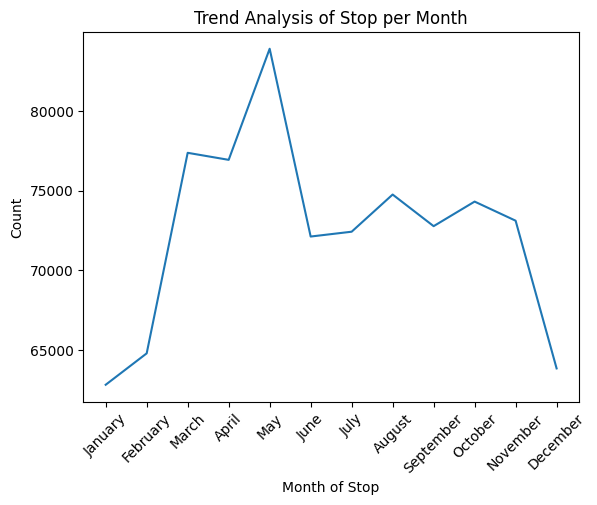

In [18]:
import calendar

#Covert the numeric value of the the month to month name using calender library
traffic_violation_new['month_name_of_stop'] = traffic_violation_new['month_of_stop'].apply(lambda x: calendar.month_name[x])

stop_by_month = traffic_violation_new.groupby(['month_of_stop','month_name_of_stop']).agg({'day_of_stop':'count'}).sort_values('month_of_stop')
print(stop_by_month)
stop_by_month = stop_by_month.reset_index(level = 'month_name_of_stop')

plt.plot(stop_by_month['month_name_of_stop'], stop_by_month['day_of_stop'])
plt.xlabel("Month of Stop")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Trend Analysis of Stop per Month")
plt.show()

In [19]:
print(traffic_violation_new['alcohol'].unique())

['No' 'Yes']


In [20]:
contingency_table = pd.crosstab(traffic_violation_new['gender'], traffic_violation_new['violation_type'])
print(contingency_table)


violation_type  Citation  SERO  Warning
gender                                 
F                 131011     3   158482
M                 306959    20   271563
U                    120     0      919


In [21]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 5333.187846065484
Degrees of Freedom: 4
P-value: 0.0
Expected Frequencies:
 [[1.45931031e+05 7.66147073e+00 1.43557308e+05]
 [2.91635223e+05 1.53110323e+01 2.86891466e+05]
 [5.23745894e+02 2.74969882e-02 5.15226609e+02]]


In [22]:
contingency_table_2 = pd.crosstab(traffic_violation_new['race'], traffic_violation_new['violation_type'])
print(contingency_table_2)

chi2, p, dof, expected = chi2_contingency(contingency_table_2)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

violation_type   Citation  SERO  Warning
race                                    
ASIAN               22189     1    28958
BLACK              140529     8   129806
HISPANIC           102712     8    73103
NATIVE AMERICAN       988     1     1164
OTHER               20462     0    25251
WHITE              151210     5   172682
Chi-square Statistic: 8210.154095850929
Degrees of Freedom: 10
P-value: 0.0
Expected Frequencies:
 [[2.57830173e+04 1.35362459e+00 2.53636291e+04]
 [1.36276262e+05 7.15458929e+00 1.34059584e+05]
 [8.86300041e+04 4.65313085e+00 8.71883428e+04]
 [1.08529828e+03 5.69788408e-02 1.06764474e+03]
 [2.30433071e+04 1.20978809e+00 2.26684832e+04]
 [1.63272111e+05 8.57188834e+00 1.60616317e+05]]


In [26]:
print(traffic_violation_new['belts'].unique())

contigency_table_3 = pd.crosstab(traffic_violation_new['gender'], traffic_violation_new['belts'])
print(contigency_table_3)

chi2, p, dof, expected = chi2_contingency(contigency_table_3)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

['No' 'Yes']
belts       No    Yes
gender               
F       277813  11683
M       557802  20740
U         1034      5
Chi-square Statistic: 139.72977847889405
Degrees of Freedom: 2
P-value: 4.55055245088113e-31
Expected Frequencies:
 [[2.78693992e+05 1.08020075e+04]
 [5.56954776e+05 2.15872241e+04]
 [1.00023164e+03 3.87683623e+01]]
